# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL's
base_url= f"http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url= f"{base_url}&appid={weather_api_key}&units={units}&q="
print(query_url)
# Lists
city_name=[]
city_lats=[]
city_lngs=[]
city_maxtemp=[]
city_humidity=[]
city_cloudiness=[]
city_wind=[]
city_country=[]
city_date=[]

item = 1
batch = 1


#Loop through all the cities in our list
for city in cities:
    
   
 # Run an API request for each of the cities
    try:
        city_data=requests.get(f"{query_url}{city}").json()
        city_name.append(city_data["name"])
        city_country.append(city_data["sys"]["country"])
        city_lats.append(city_data["coord"]["lat"])
        city_lngs.append(city_data["coord"]["lon"])
        city_maxtemp.append(city_data["main"]["temp_max"])    
        city_humidity.append(city_data["main"]["humidity"])
        city_cloudiness.append(city_data["clouds"]["all"])
        city_wind.append(city_data["wind"]["speed"])
        city_date.append(city_data["dt"])
        print(f"Processing Record {item} of set {batch} | {city}")
        item+= 1
        
        
        if item>50:
            batch+=1
            item=1
            time.sleep(1.01)
            
  
    except:
        print(f"City '{city}' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?&appid=9812796e461981b836ad41e4050062d5&units=imperial&q=
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | phalombe
Processing Record 3 of set 1 | thinadhoo
Processing Record 4 of set 1 | kapaa
Processing Record 5 of set 1 | albany
Processing Record 6 of set 1 | genhe
Processing Record 7 of set 1 | avarua
Processing Record 8 of set 1 | novomykolayivka
Processing Record 9 of set 1 | kushima
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | ribeirao bonito
Processing Record 12 of set 1 | thompson
Processing Record 13 of set 1 | acapulco
Processing Record 14 of set 1 | kudahuvadhoo
Processing Record 15 of set 1 | san carlos de bariloche
Processing Record 16 of set 1 | atuona
Processing Record 17 of set 1 | provideniya
Processing Record 18 of set 1 | constitucion
Processing Record 19 of set 1 | katsuura
Processing Record 20 of set 1 | tiksi
Processing Record 21 of set 1 | dunedin
Processing Record 22 o

Processing Record 29 of set 4 | alekseyevka
Processing Record 30 of set 4 | petropavlovsk-kamchatskiy
Processing Record 31 of set 4 | inuvik
Processing Record 32 of set 4 | kaitangata
Processing Record 33 of set 4 | marzuq
Processing Record 34 of set 4 | coruripe
Processing Record 35 of set 4 | anadyr
Processing Record 36 of set 4 | vanderhoof
Processing Record 37 of set 4 | sechura
Processing Record 38 of set 4 | north platte
Processing Record 39 of set 4 | torbay
Processing Record 40 of set 4 | abaza
Processing Record 41 of set 4 | narsaq
Processing Record 42 of set 4 | upernavik
Processing Record 43 of set 4 | aksu
Processing Record 44 of set 4 | tuktoyaktuk
Processing Record 45 of set 4 | cairns
Processing Record 46 of set 4 | at-bashi
Processing Record 47 of set 4 | muhos
Processing Record 48 of set 4 | geraldton
Processing Record 49 of set 4 | victoria
Processing Record 50 of set 4 | aktas
Processing Record 1 of set 5 | hosakote
Processing Record 2 of set 5 | monrovia
Processing 

Processing Record 10 of set 8 | milkovo
Processing Record 11 of set 8 | coquimbo
Processing Record 12 of set 8 | tuatapere
Processing Record 13 of set 8 | clarence town
Processing Record 14 of set 8 | guajara
Processing Record 15 of set 8 | iqaluit
Processing Record 16 of set 8 | namibe
Processing Record 17 of set 8 | hamilton
Processing Record 18 of set 8 | brae
Processing Record 19 of set 8 | khani
Processing Record 20 of set 8 | lulea
Processing Record 21 of set 8 | montepuez
Processing Record 22 of set 8 | fairbanks
Processing Record 23 of set 8 | san cristobal
Processing Record 24 of set 8 | buckeye
Processing Record 25 of set 8 | maiduguri
Processing Record 26 of set 8 | nizhniy kuranakh
Processing Record 27 of set 8 | goundam
Processing Record 28 of set 8 | buala
Processing Record 29 of set 8 | lasa
Processing Record 30 of set 8 | yulara
Processing Record 31 of set 8 | saldanha
Processing Record 32 of set 8 | yumen
Processing Record 33 of set 8 | jiamusi
Processing Record 34 of 

Processing Record 46 of set 11 | saint anthony
Processing Record 47 of set 11 | calatayud
Processing Record 48 of set 11 | orodara
Processing Record 49 of set 11 | gunjur
Processing Record 50 of set 11 | busayra
Processing Record 1 of set 12 | hondo
Processing Record 2 of set 12 | jalu
Processing Record 3 of set 12 | charlestown
Processing Record 4 of set 12 | raudeberg
Processing Record 5 of set 12 | portree
City 'nguiu' not found. Skipping...
Processing Record 6 of set 12 | seminole
Processing Record 7 of set 12 | beyneu
Processing Record 8 of set 12 | sobrance
Processing Record 9 of set 12 | sungairaya
Processing Record 10 of set 12 | katobu
Processing Record 11 of set 12 | victor harbor
Processing Record 12 of set 12 | alcaudete
Processing Record 13 of set 12 | puerto barrios
Processing Record 14 of set 12 | yafran
Processing Record 15 of set 12 | codrington
Processing Record 16 of set 12 | emerald
Processing Record 17 of set 12 | sitarganj
Processing Record 18 of set 12 | hami
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df=pd.DataFrame({"City": city_name,
                     "Lat": city_lats,
                     "Lng": city_lngs,
                     "Max Temp (F)": city_maxtemp,
                     "Humidity(%)": city_humidity,
                     "Cloudiness(%)": city_cloudiness,
                     "Wind Speed(MPH)": city_wind,
                     "Country": city_country,
                     "Data": city_date})
city_df

,City,Lat,Lng,Max Temp (F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Data
0,Barrow,71.2906,-156.7887,1.40,78,90,23.02,US,1610465022
1,Phalombe,-15.8064,35.6507,76.24,88,100,3.56,MW,1610465022
2,Thinadhoo,0.5333,72.9333,82.02,78,100,18.01,MV,1610465022
3,Kapaa,22.0752,-159.3190,66.20,94,20,8.05,US,1610465022
4,Albany,42.6001,-73.9662,34.00,66,100,6.55,US,1610465023
...,...,...,...,...,...,...,...,...,...
590,Irará,-12.0500,-38.7667,84.33,60,66,8.86,BR,1610465144
591,Batamshinskiy,50.5594,58.2747,-9.40,70,0,4.47,KZ,1610465144
592,Natchitoches,31.7668,-93.1335,35.60,93,1,2.13,US,1610465145
593,Chenghai,23.4632,116.7680,46.40,61,0,4.47,CN,1610465145


In [5]:
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#There are no cities with a humidity above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

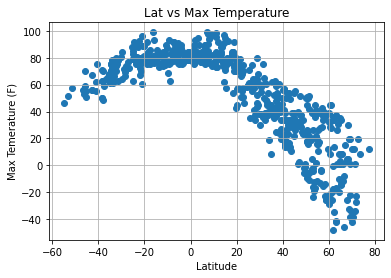

In [6]:
#Build scatterplot for Lat vs Max Temp
plt.scatter(city_df["Lat"], city_df["Max Temp (F)"], marker="o")

#Label scatterplot
plt.title("Lat vs Max Temperature")
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save scatterplot
plt.savefig("Images/Lat vs Max Temp")

plt.show()

As we can see from the scatterplot above, the more north the city is in latitude the max temperature starts to go down.

## Latitude vs. Humidity Plot

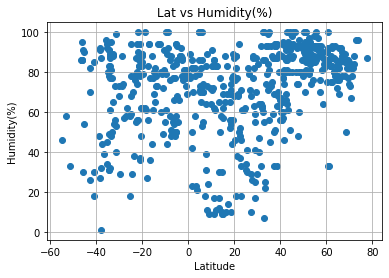

In [7]:
#Build scatterplot for Lat vs Humidity
plt.scatter(city_df["Lat"], city_df["Humidity(%)"], marker="o")

#Label scatterplot
plt.title("Lat vs Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save scatterplot
plt.savefig("Images/Lat vs Humidity(%)")

plt.show()

As we can see from the scatterplot above, humidity isnt entirely dependant on latitude. There is a big range of level of humidity for cities between 0 and 20 degrees latitude.

## Latitude vs. Cloudiness Plot

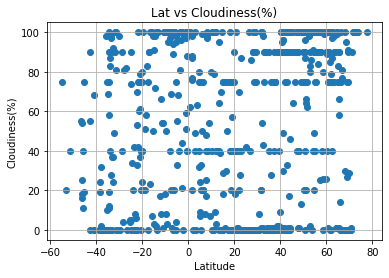

In [8]:
#Build scatterplot for Lat vs Cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness(%)"], marker="o")

#Label scatterplot
plt.title("Lat vs Cloudiness(%)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save scatterplot
plt.savefig("Images/Lat vs Cloudiness(%)")

plt.show()

As we can see from the scatterplot above, like the humidity plot above latitude doesnt really effect the cloudiness of a region as there is a wide range of cloudiness for any given latitude.

## Latitude vs. Wind Speed Plot

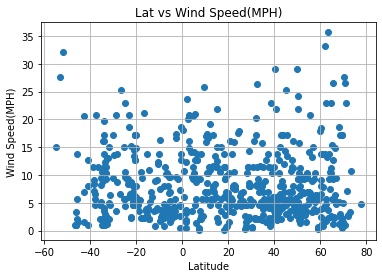

In [9]:
#Build scatterplot for Lat vs Cloudiness
plt.scatter(city_df["Lat"], city_df["Wind Speed(MPH)"], marker="o")

#Label scatterplot
plt.title("Lat vs Wind Speed(MPH)")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save scatterplot
plt.savefig("Images/Lat vs Wind Speed(MPH)")

plt.show()

## Linear Regression

In [12]:
#Northern Hemisphere Dataframe
north_df=city_df.loc[city_df['Lat'] > 0]

#Souther Hemisphere Dataframe
south_df=city_df.loc[city_df['Lat'] < 0]

,City,Lat,Lng,Max Temp (F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Data
1,Phalombe,-15.8064,35.6507,76.24,88,100,3.56,MW,1610465022
6,Avarua,-21.2078,-159.7750,78.80,78,61,8.05,CK,1610465023
9,Ushuaia,-54.8000,-68.3000,46.40,46,75,14.97,AR,1610464861
10,Ribeirão Bonito,-22.0667,-48.1761,74.84,90,100,6.51,BR,1610465024
14,Bariloche,-41.1456,-71.3082,55.40,30,0,12.66,AR,1610464963
...,...,...,...,...,...,...,...,...,...
578,Humaitá,-7.5061,-63.0208,91.42,51,69,3.58,BR,1610465142
579,Carauari,-4.8828,-66.8958,85.19,68,33,3.78,BR,1610465142
588,Opuwo,-18.0607,13.8400,81.97,27,83,10.58,NA,1610465144
590,Irará,-12.0500,-38.7667,84.33,60,66,8.86,BR,1610465144


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8681136812934721


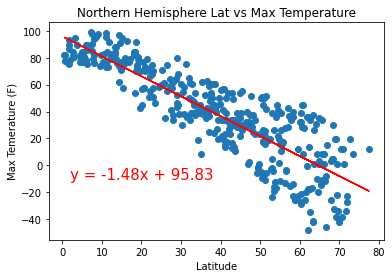

In [27]:
#Linear Regression for Northern Hemisphere Lat vs Max Temp
x_values=north_df['Lat']
y_values=north_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(north_df["Lat"], north_df["Max Temp (F)"], marker="o")

#Label scatterplot
plt.title("Northern Hemisphere Lat vs Max Temperature")
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(2,-10),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, the more north the city is in latitude the max temperature starts to go down.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.708156498322015


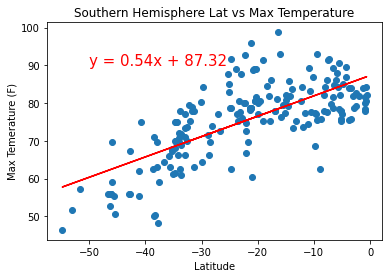

In [22]:
#Linear Regression for Southern Hemisphere Lat vs Max Temp
x_values=south_df['Lat']
y_values=south_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(south_df["Lat"], south_df["Max Temp (F)"], marker="o")

#Label scatterplot
plt.title("Southern Hemisphere Lat vs Max Temperature")
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-50,90),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, the closer the city is to the equator the max temperature begins to rise.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.43817724585790563


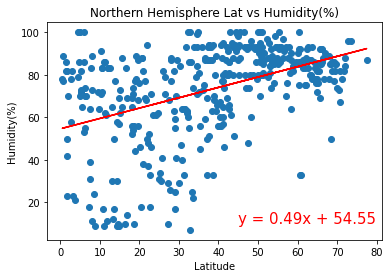

In [30]:
#Linear Regression for Northern Hemisphere Lat vs Humidity
x_values=north_df['Lat']
y_values=north_df['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(north_df["Lat"], north_df["Humidity(%)"], marker="o")

#Label scatterplot
plt.title("Northern Hemisphere Lat vs Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(45,10),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, there is a big range of level of humidity for cities between 0 and 20 degrees latitude. Once the latitude is above 40 humidity starts to stay above 60% with a few outliers below but not as much closer to the equator

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19498164613167696


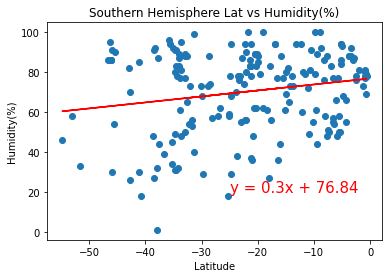

In [33]:
#Linear Regression for Southern Hemisphere Lat vs Humidity
x_values=south_df['Lat']
y_values=south_df['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(south_df["Lat"], south_df["Humidity(%)"], marker="o")

#Label scatterplot
plt.title("Southern Hemisphere Lat vs Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-25,20),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, latitude doesnt seem to have much of an effect in the southern hemisphere as the range of humidity  sits between 20% and 100% with all degrees of latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22214755183498883


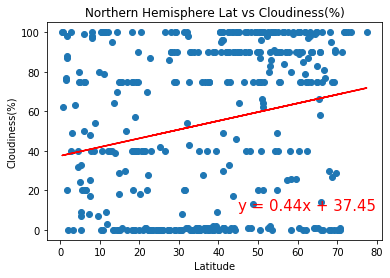

In [34]:
#Linear Regression for Northern Hemisphere Lat vs Cloudiness(%)
x_values=north_df['Lat']
y_values=north_df['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(north_df["Lat"], north_df["Cloudiness(%)"], marker="o")

#Label scatterplot
plt.title("Northern Hemisphere Lat vs Cloudiness(%)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(45,10),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, latitude does not effect the cloudiness of a city.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2732818243406041


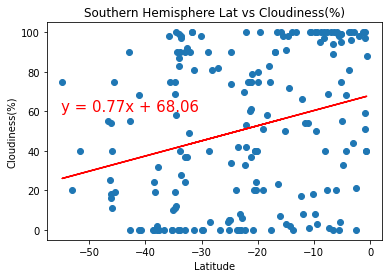

In [40]:
#Linear Regression for Southern Hemisphere Lat vs Cloudiness(%)
x_values=south_df['Lat']
y_values=south_df['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(south_df["Lat"], south_df["Cloudiness(%)"], marker="o")

#Label scatterplot
plt.title("Southern Hemisphere Lat vs Cloudiness(%)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-55,60),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, latitude does not effect the cloudiness of a city. It does seem that the further south from the equator you go cloudiness stays between 20 and 80% but this may due to a lower number of cities further south than -50 degrees latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.042197555764530305


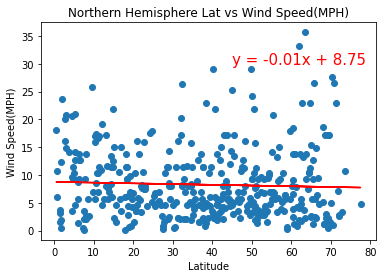

In [42]:
#Linear Regression for Northern Hemisphere Lat vs Wind Speed(MPH)
x_values=north_df['Lat']
y_values=north_df['Wind Speed(MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(north_df["Lat"], north_df["Wind Speed(MPH)"], marker="o")

#Label scatterplot
plt.title("Northern Hemisphere Lat vs Wind Speed(MPH)")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(45,30),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, latitude does not effect windspeed as windspeed has a wide range of values.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18018972576664824


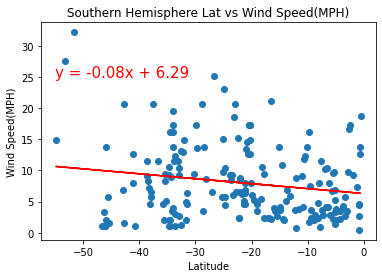

In [44]:
#Linear Regression for Southern Hemisphere Lat vs Wind Speed(MPH)
x_values=south_df['Lat']
y_values=south_df['Wind Speed(MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(f"The r-value is: {rvalue}")

plt.scatter(south_df["Lat"], south_df["Wind Speed(MPH)"], marker="o")

#Label scatterplot
plt.title("Southern Hemisphere Lat vs Wind Speed(MPH)")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-55,25),fontsize=15,color="red")
plt.show()

As we can see from the scatterplot and line regression above, latitude does not effect windspeed as windspeed has a wide range of values but -50 degrees latitude has the highest windspeed but there is not enough data to determine if this is more than an outlier.